In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

## Again start by downloading the neccessary data into the Colab Instance

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2025-05-17 04:00:16--  https://storage.googleapis.com/learning-datasets/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.207, 142.250.101.207, 142.250.141.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   238MB/s    in 0.6s    

2025-05-17 04:00:17 (238 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2025-05-17 04:00:17--  https://storage.googleapis.com/learning-datasets/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.207, 142.250.101.207, 142.250.141.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/z

In [3]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [4]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')
# Directory with our training horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')
# Directory with our training human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

train_horse_names = os.listdir('/tmp/horse-or-human/horses')
print(train_horse_names[:10])
train_human_names = os.listdir('/tmp/horse-or-human/humans')
print(train_human_names[:10])
validation_horse_hames = os.listdir('/tmp/validation-horse-or-human/horses')
print(validation_horse_hames[:10])
validation_human_names = os.listdir('/tmp/validation-horse-or-human/humans')
print(validation_human_names[:10])

['horse20-4.png', 'horse36-0.png', 'horse04-4.png', 'horse10-8.png', 'horse29-7.png', 'horse18-5.png', 'horse40-7.png', 'horse03-8.png', 'horse16-8.png', 'horse16-1.png']
['human04-08.png', 'human11-23.png', 'human14-20.png', 'human04-05.png', 'human05-17.png', 'human10-12.png', 'human14-23.png', 'human09-19.png', 'human13-09.png', 'human14-03.png']
['horse4-014.png', 'horse5-076.png', 'horse2-368.png', 'horse4-548.png', 'horse5-514.png', 'horse2-596.png', 'horse6-345.png', 'horse2-544.png', 'horse3-521.png', 'horse1-264.png']
['valhuman05-09.png', 'valhuman04-19.png', 'valhuman03-22.png', 'valhuman01-05.png', 'valhuman01-08.png', 'valhuman04-10.png', 'valhuman05-05.png', 'valhuman02-11.png', 'valhuman03-23.png', 'valhuman04-02.png']


In [5]:
import sys
import tensorflow as tf

# This script requires TensorFlow 2 and Python 3.
if tf.__version__.split('.')[0] != '2':
    raise Exception((f"The script is developed and tested for tensorflow 2. "
                     f"Current version: {tf.__version__}"))

if sys.version_info.major < 3:
    raise Exception((f"The script is developed and tested for Python 3. "
                     f"Current version: {sys.version_info.major}"))

## Then again define your model and optimizer

In [6]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 100x100 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,617,665 (9.99 MB)

 Trainable params: 2,617,665 (9.99 MB)

 Non-trainable params: 0 (0.00 B)

None


In [8]:
# Creación del Optimizador
# Aquí estamos definiendo el optimizador para entrenar la red neuronal. En este caso, Adam, que es uno de los optimizadores más usados
# en deep learning.
# 🔹 Adam Optimizer
# * Es una versión avanzada de descenso de gradiente, que ajusta automáticamente la velocidad de aprendizaje en cada paso.
# * Combina las ventajas de Momentum y RMSprop para mejorar la estabilidad del entrenamiento.
# 🔹 learning_rate=0.0001
# * Es la tasa de aprendizaje, que determina cuánto cambia el modelo en cada actualización.
# * Un valor demasiado alto puede hacer que el modelo aprenda muy rápido y sea inestable.
# * Un valor demasiado bajo puede hacer que el modelo aprenda muy lentamente.
# * 0.0001 es un valor pequeño pero seguro para evitar fluctuaciones grandes en el entrenamiento.
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
# Compilación del Modelo
# Esta línea prepara el modelo para el entrenamiento, especificando qué función de pérdida y qué métrica evaluar.
# 🔹 loss='binary_crossentropy'
# * Se usa cuando tenemos dos clases (caballos vs humanos).
# * Mide qué tan bien el modelo predice la clase correcta.
# * Si el valor de pérdida es bajo, significa que el modelo está clasificando bien.
# 🔹 optimizer=optimizer
# * Aquí se usa el optimizador Adam que definimos antes.
# * El optimizador es quien ajusta los pesos del modelo para mejorar la precisión.
# 🔹 metrics=['acc']
# * acc representa accuracy (precisión).
# * Es una métrica que nos dice cuántos ejemplos fueron clasificados correctamente.
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['acc'])

## Now when we organize the data into Generators note how we use many more kinds of Data Augmentation!

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be augmented wiht the full list of augmentation techniques below
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
      )

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(100, 100),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human',
        target_size=(100, 100),
        class_mode='binary')


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


## Train your model with the new augmented data
Since we now have more data due to the data augmentation this training process will take a bit longer than the last time. However, you'll find that the results are much better!

In [10]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,
      epochs=100,
      verbose=1,
      validation_data=validation_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - acc: 0.4999 - loss: 0.6933 - val_acc: 0.5000 - val_loss: 0.6795
Epoch 2/100
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - acc: 0.5625 - loss: 0.6792

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - acc: 0.5625 - loss: 0.6792 - val_acc: 0.5000 - val_loss: 0.6775
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 968ms/step - acc: 0.5218 - loss: 0.6804 - val_acc: 0.5000 - val_loss: 0.6863
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - acc: 0.4688 - loss: 0.6989 - val_acc: 0.5000 - val_loss: 0.6753
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 969ms/step - acc: 0.5963 - loss: 0.6726 - val_acc: 0.6719 - val_loss: 0.6243
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - acc: 0.6406 - loss: 0.6561 - val_acc: 0.7148 - val_loss: 0.6178
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - acc: 0.7163 - loss: 0.6444 - val_acc: 0.7422 - val_loss: 0.5799
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - acc: 0.7969 - loss: 0.6220 - val_acc: 0.5859 - val_loss: 0.6081
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - acc: 0.6893 - loss: 0.6142 - val_acc: 0.8789 - val_loss: 0.5083
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - acc: 0.7188 - loss: 0.5797 - val

## Try Running the Model Again

Can you confuse it this time? Or did the extra data augmentation help the model generalize? What do you think it was about your confusing examples that are no longer confusing (or what is still confusing)?

In [11]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(100, 100))
  x = img_to_array(img)
  x = x / 255.0
  x = np.expand_dims(x, axis=0)

  image_tensor = np.vstack([x])
  classes = model.predict(image_tensor)
  print(classes)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving foto1.jpg to foto1 (2).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 733ms/step
[[0.99966824]]
[0.99966824]
foto1 (2).jpg is a human


## Finally again lets visualize some of the layers for intuition

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 100, 100, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 662ms/step


<ipython-input-12-52a807003e1f>:69: RuntimeWarning: invalid value encountered in divide
  x /= x.std()
<ipython-input-12-52a807003e1f>:72: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


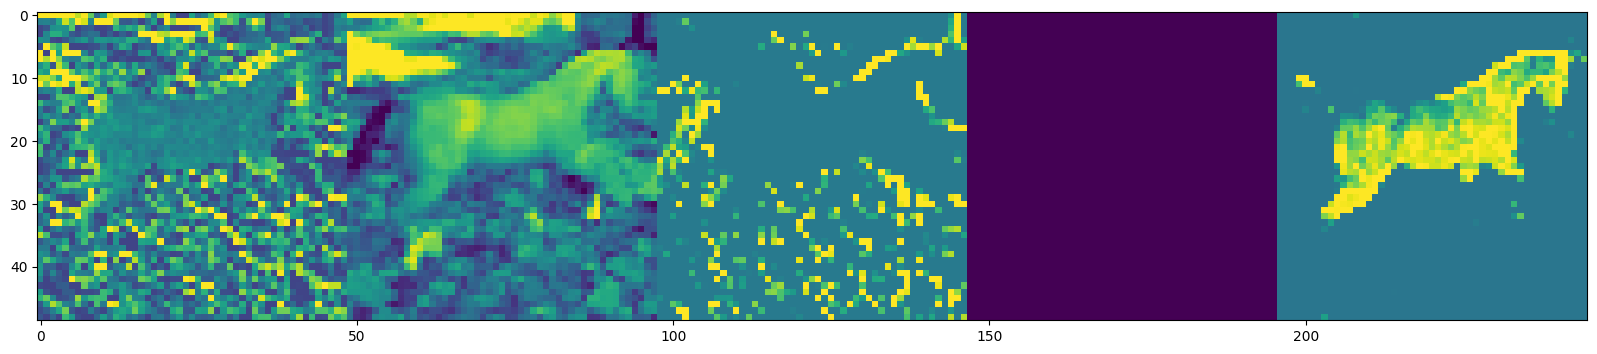

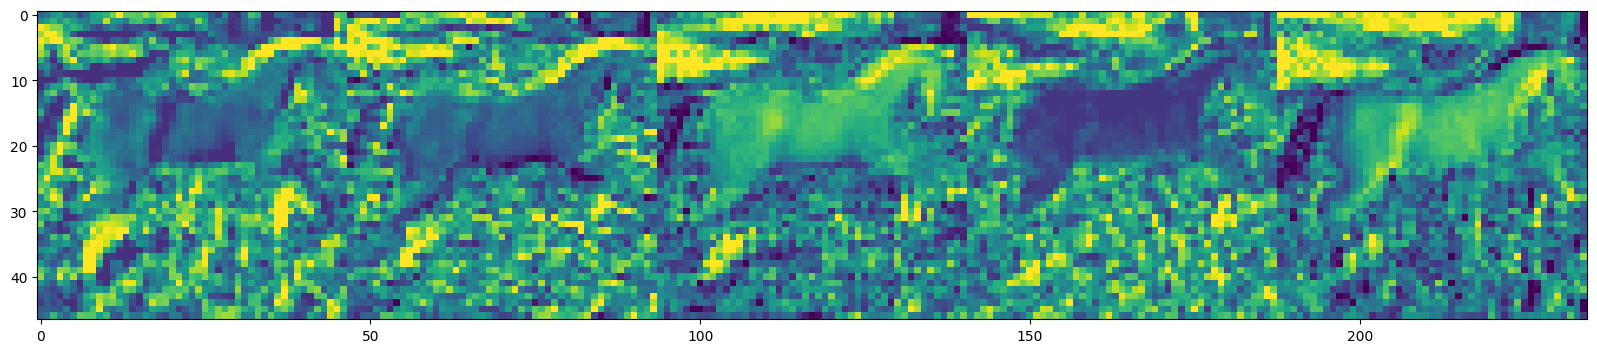

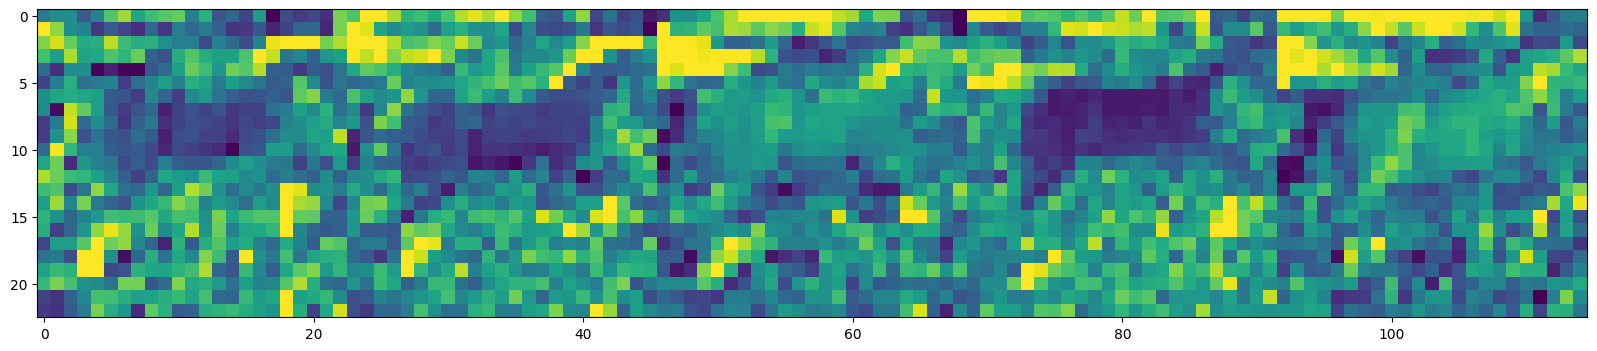

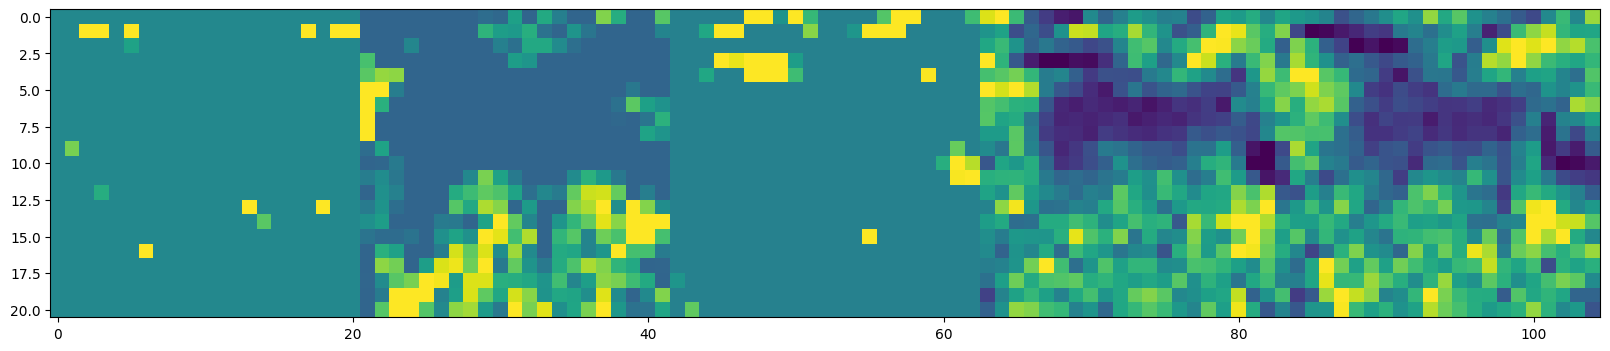

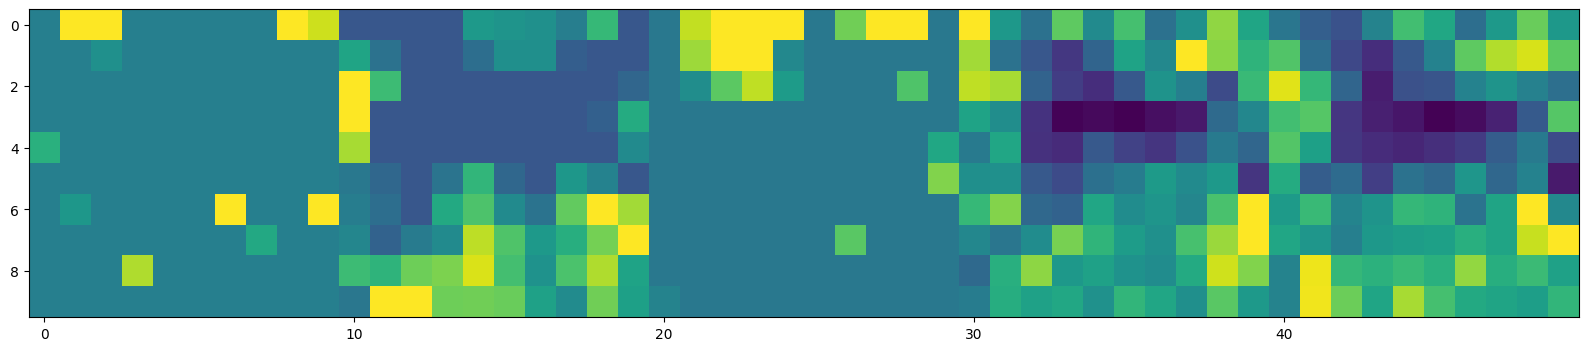

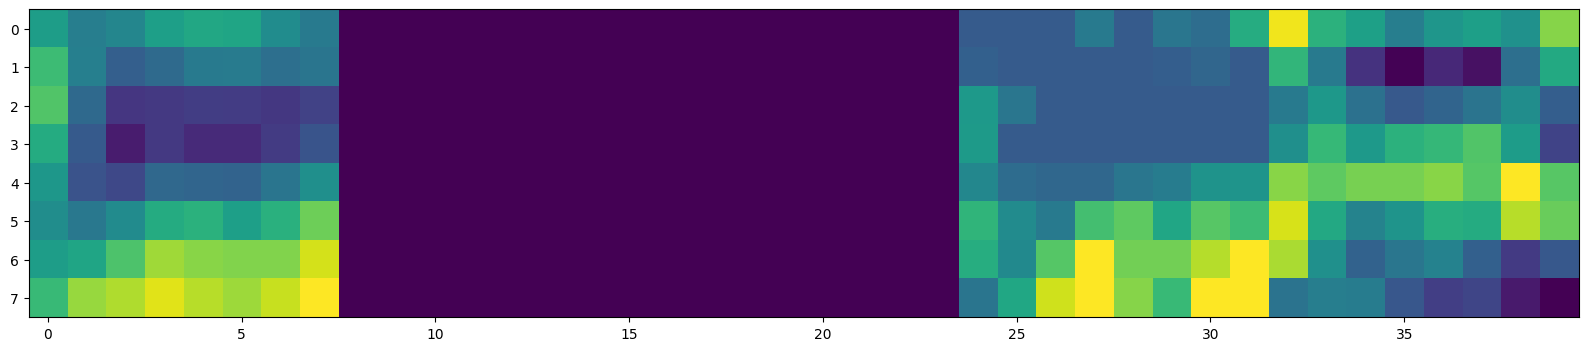

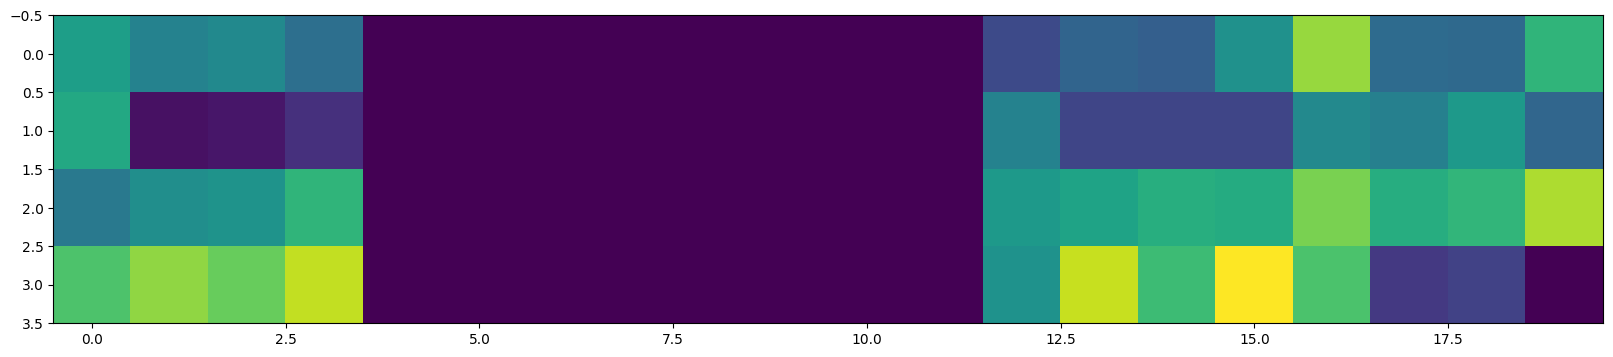

In [12]:
import random
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.inputs, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)
# uncomment the following line if you want to pick the Xth human file manually
# img_path = human_img_files[0]

img = load_img(img_path, target_size=(100, 100))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (100, 100, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 100, 100, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
# Este código está diseñado para visualizar mapas de características (feature maps) generados por capas convolucionales o de max pooling
# en una red neuronal.
# 1. Iteración sobre capas y mapas de características
#    * Se recorren las capas y sus respectivos mapas de características.
#    * Se filtran solo las capas con mapas de características en formato 4D (evitando capas totalmente conectadas).
# 2. Procesamiento de los mapas de características
#    * Se obtiene el número de características (n_features), limitándolo a 5 para facilitar la visualización.
#    * Se determina el tamaño (size) de cada mapa de características.
#    * Se crea una matriz display_grid para organizar la visualización.
# 3. Normalización y ajuste de los valores del mapa de características
#    * Se extraen los valores del mapa de características.
#    * Se normalizan restando la media y dividiendo por la desviación estándar.
#    * Se escalan los valores multiplicándolos por 64 y sumando 128.
#    * Se restringen los valores al rango [0, 255] y se convierten a enteros (uint8).
# 4. Organización de las imágenes en una cuadrícula
#    * Se colocan los mapas de características en display_grid, organizándolos en una disposición horizontal.
# 5. Visualización
#    * Se configura la escala de la imagen en función de n_features.
#    * Se desactiva la cuadrícula en la visualización.
#    * Se usa plt.imshow para mostrar display_grid con el mapa de colores viridis.
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    n_features = min(n_features,5) # limit to 5 features for easier viewing
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    #plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

## Clean Up

Before running the next exercise, run the following cell to terminate the kernel and free memory resources:

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)